In [24]:
'''libraries import'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Heart Disease Dataset EDA
dataset kaggle link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [6]:
file_name =  "heart_cleveland_upload.csv"
df =  pd.read_csv(file_name)

**dataframe head**

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## column description  
|  Column Name in DataFrame | Column Name | Scale |
| --- | --- | --- |
| age | age | in years |
| sex | sex | 1 = male; 0 = female |
| cp | chest pain type | Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic |
| trestbps | resting blood pressure | in mm Hg on admission to the hospital |
| chol | serum cholestora | in mg/dl |
| fbs | fasting blood sugar | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
| restecg | resting electrocardiographic results | Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach | maximum heart rate achieved | |
|exang | exercise induced angina | (1 = yes; 0 = no) | 
| oldpeak | ST depression induced by exercise relative to rest | |
| slope | the slope of the peak exercise ST segment | Value 0: upsloping, Value 1: flat, Value 2: downsloping |
| ca | number of major vessels | (0-3) colored by flourosopy |
| thal | Thalassemia | 0 = normal; 1 = fixed defect; 2 = reversable defect | 
| condition | patient state | 0 = no disease, 1 = disease | 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


** no null value**

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [15]:
target = df['condition']
features =  df.iloc[:,:-1]

## Checking the target balance

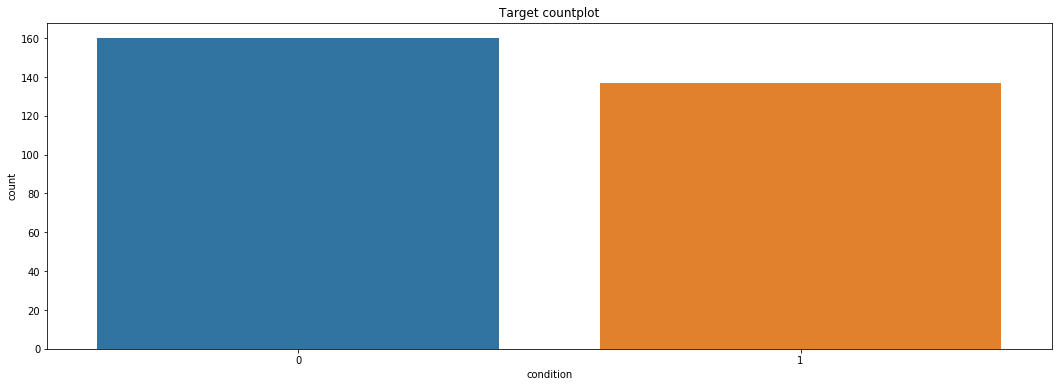

In [102]:
plt.figure(figsize=(18,6))
target_countplot = sns.countplot(target)
target_countplot.set_title("Target countplot")
plt.show(target_countplot)

In [35]:
target.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [37]:
print(f"targer 1's count in percentage is {round(target.value_counts()[1]/len(target), 2)} %")
print(f"target 0's count in percentage is {round(target.value_counts()[0]/target.shape[0], 2)} %")

targer 1's count in percentage is 0.46 %
target 0's count in percentage is 0.54 %


**Conclusion: the dataset is balanced**

## Parameters distribution plots

### Age

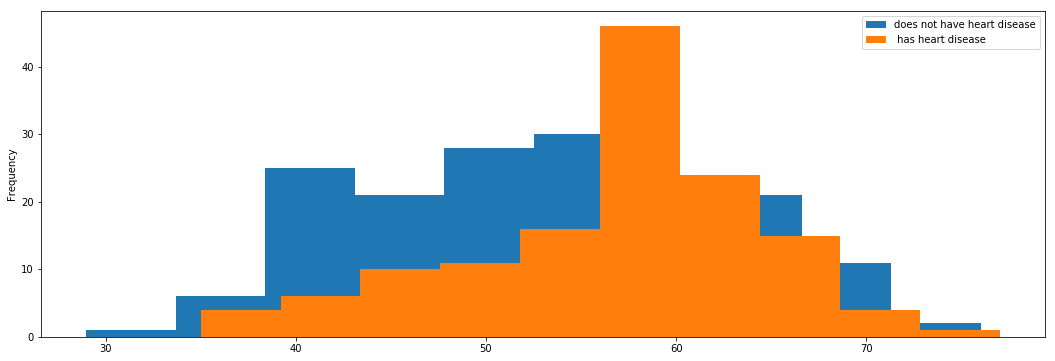

In [149]:
q = plt.figure(figsize=(18,6))
g = df.groupby('condition').age.plot(kind='hist')
plt.legend(['does not have heart disease',' has heart disease'])
plt.show()
plt.close(q)

**Conclusion: Eldery patient more frequent have heart disease**

### Sex

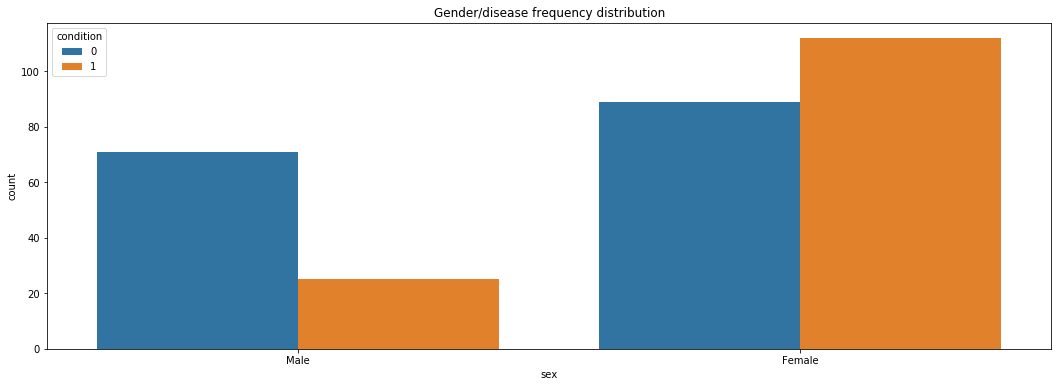

In [148]:
q = plt.figure(figsize=(18,6))
sex_condition_plot =sns.countplot(x="sex", hue="condition", data=df)
sex_condition_plot.set_xticklabels(['Male','Female'])
sex_condition_plot.set_title("Gender/disease frequency distribution")
plt.show(sex_condition_plot)
plt.close(q)

**Conclusion: Females has heart diesease more frequent than males** 

### chest pain type

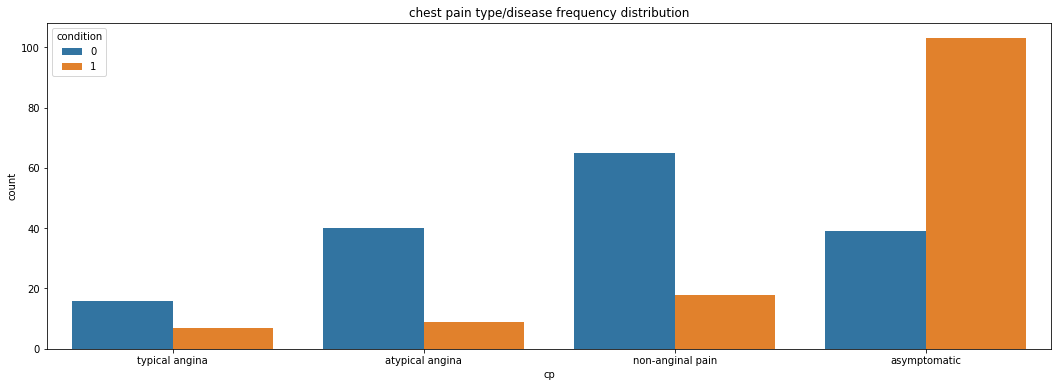

In [146]:
q = plt.figure(figsize=(18,6))
cp_condition_plot =sns.countplot(x="cp", hue="condition", data=df)
cp_condition_plot.set_xticklabels(['typical angina','atypical angina', 'non-anginal pain','asymptomatic'])
cp_condition_plot.set_title("chest pain type/disease frequency distribution")
plt.show(cp_condition_plot)
plt.close(q)

**conclusion most of patients with heart disease were asymptomatic**

### resting blood pressure	

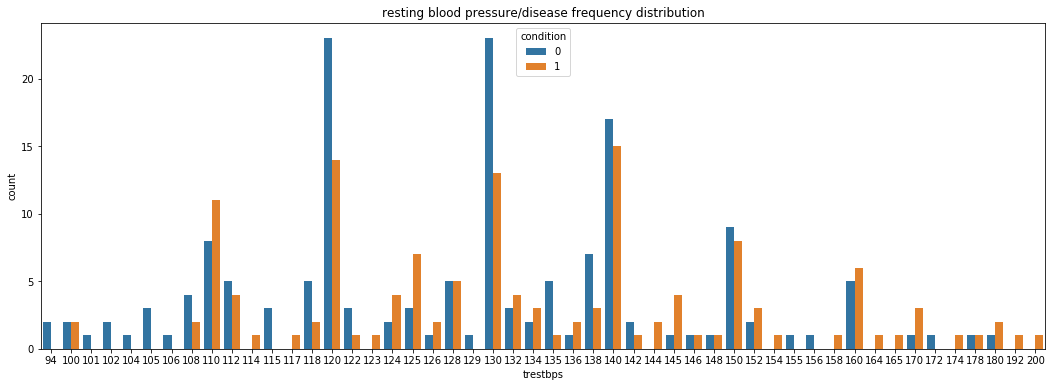

In [145]:
q = plt.figure(figsize=(18,6))
trestbps_condition_plot =sns.countplot(x="trestbps", hue="condition", data=df)
trestbps_condition_plot.set_title("resting blood pressure/disease frequency distribution")
plt.show(trestbps_condition_plot)
plt.close(q)

### serum cholestora	

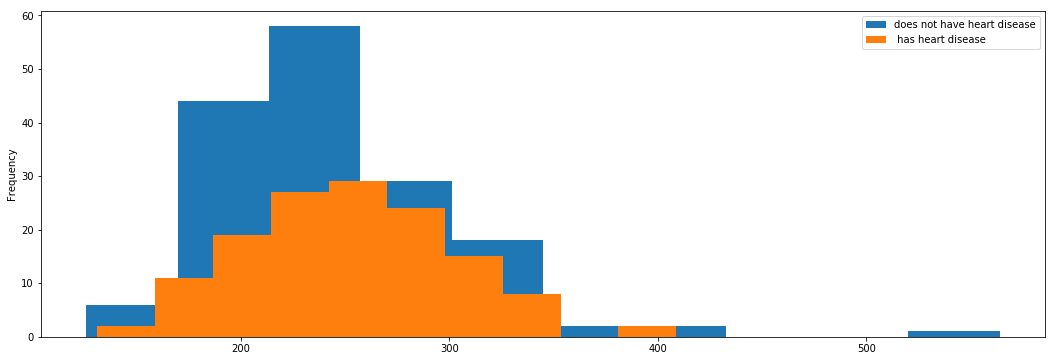

In [144]:
q = plt.figure(figsize=(18,6))
g = df.groupby('condition').chol.plot(kind='hist')
plt.legend(['does not have heart disease',' has heart disease'])
plt.show()
plt.close(q)

### fasting blood sugar	

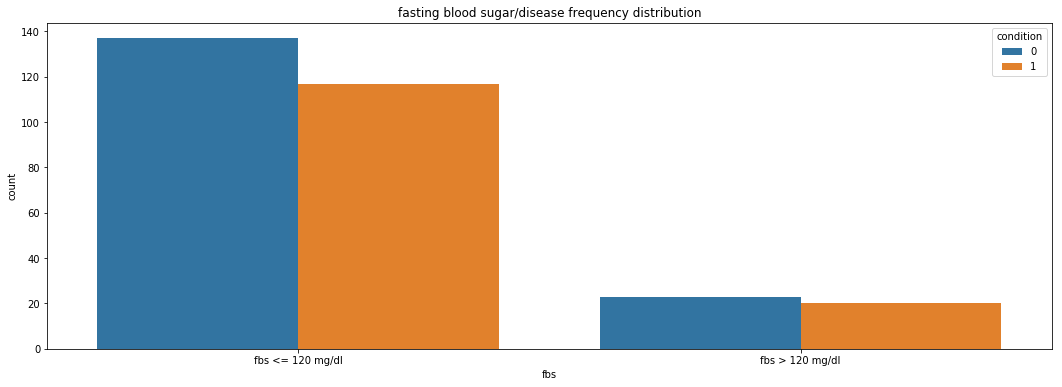

In [143]:
q = plt.figure(figsize=(18,6))
fbs_condition_plot =sns.countplot(x="fbs", hue="condition", data=df)
fbs_condition_plot.set_xticklabels(['fbs <= 120 mg/dl','fbs > 120 mg/dl'])
fbs_condition_plot.set_title("fasting blood sugar/disease frequency distribution")
plt.show(fbs_condition_plot)
plt.close(q)

**Conclusion: people with how fbs more frequent have heart disease**

### resting electrocardiographic results	

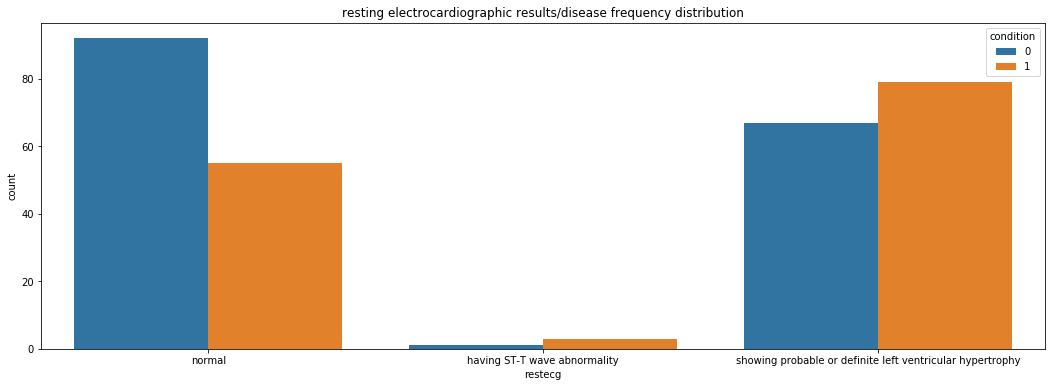

In [142]:
q = plt.figure(figsize=(18,6))
restecg_condition_plot =sns.countplot(x="restecg", hue="condition", data=df)
restecg_condition_plot.set_xticklabels(['normal','having ST-T wave abnormality','showing probable or definite left ventricular hypertrophy'])
restecg_condition_plot.set_title("resting electrocardiographic results/disease frequency distribution")
plt.show(fbs_condition_plot)
plt.close(q)

** Conclusion: Patients showing left ventriculuar hupertrophy more frequent has heart disease **

### maximum heart rate achieved	

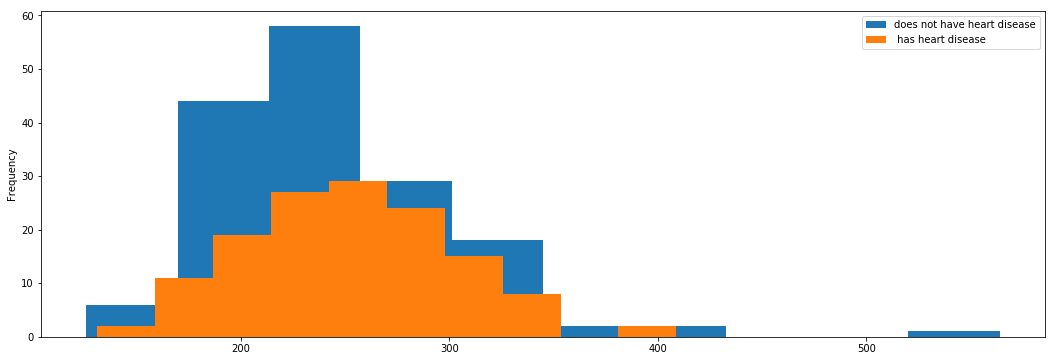

In [141]:
q = plt.figure(figsize=(18,6))
g = df.groupby('condition').chol.plot(kind='hist')
plt.legend(['does not have heart disease',' has heart disease'])
plt.show()
plt.close(q)

### exercise induced angina	

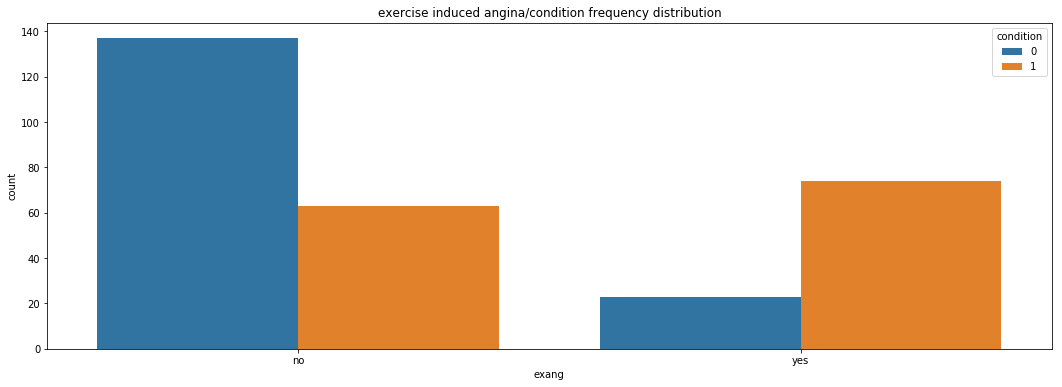

In [140]:
q = plt.figure(figsize=(18,6))
exang_condition_plot =sns.countplot(x="exang", hue="condition", data=df)
exang_condition_plot.set_xticklabels(['no','yes'])
exang_condition_plot.set_title("exercise induced angina/condition frequency distribution")
plt.show(slope_condition_plot)
plt.close(q)

** Conclusion: patients who had excercise included angine more frequent had heart disease**

### ST depression induced by exercise relative to rest

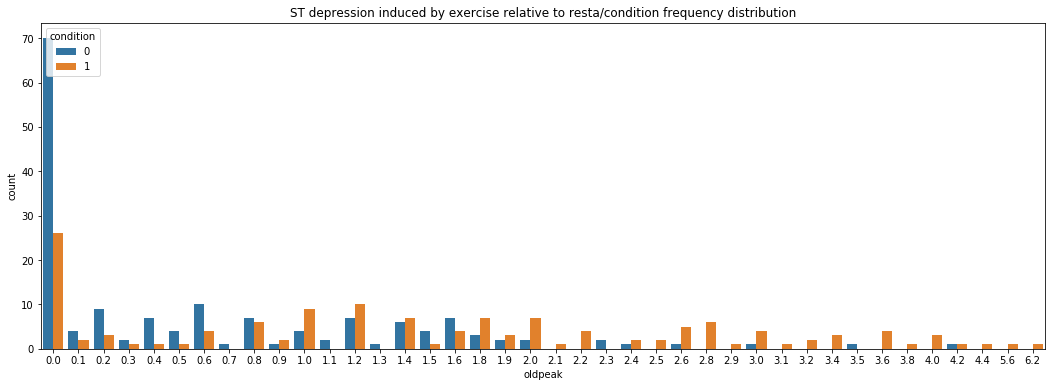

In [139]:
q = plt.figure(figsize=(18,6))
oldpeak_condition_plot =sns.countplot(x="oldpeak", hue="condition", data=df)
oldpeak_condition_plot.set_title("ST depression induced by exercise relative to resta/condition frequency distribution")
plt.show(oldpeak_condition_plot)
plt.close(q)

** Conclusion: patients with high ST depression have more frequent heart disease**

### the slope of the peak exercise ST segment

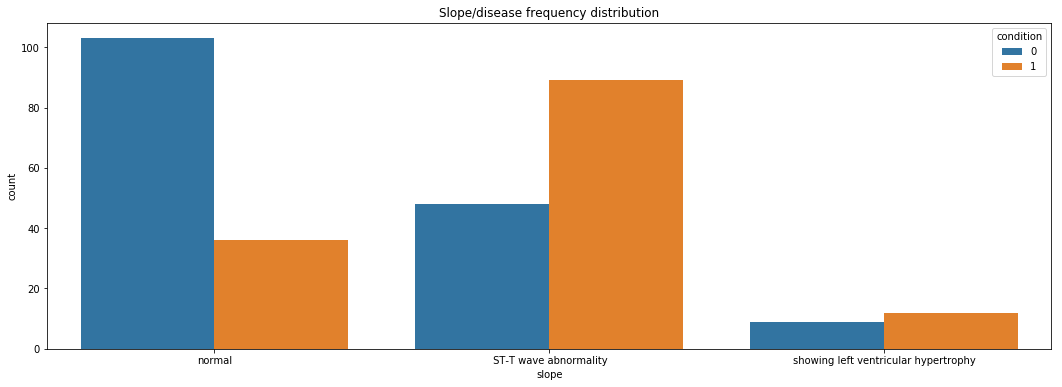

NameError: name 'close' is not defined

In [138]:
q = plt.figure(figsize=(18,6))
slope_condition_plot =sns.countplot(x="slope", hue="condition", data=df)
slope_condition_plot.set_xticklabels(['normal',' ST-T wave abnormality','showing left ventricular hypertrophy'])
slope_condition_plot.set_title("Slope/disease frequency distribution")
plt.show(slope_condition_plot)
close(q)

**Conclusion: patients with flat slope more frequent have the heart disease**

### number of major vessels	

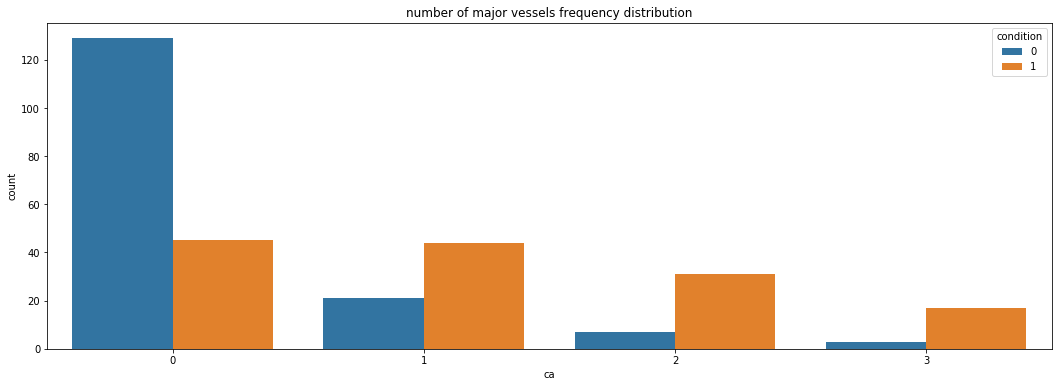

In [137]:
q = plt.figure(figsize=(18,6))
ca_condition_plot =sns.countplot(x="ca", hue="condition", data=df)
ca_condition_plot.set_title("number of major vessels frequency distribution")
plt.show(ca_condition_plot)
plt.close(q)

** Conclusion: patients with more number of major vessels have more frequent heart disease**

### Thalassemia	

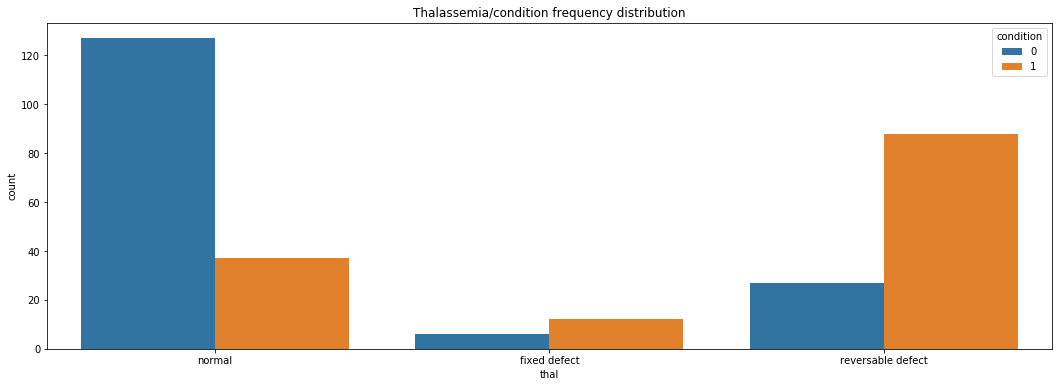

In [136]:
q = plt.figure(figsize=(18,6))
thal_condition_plot =sns.countplot(x="thal", hue="condition", data=df)
thal_condition_plot.set_xticklabels(['normal','fixed defect','reversable defect'])
thal_condition_plot.set_title("Thalassemia/condition frequency distribution")
plt.show(thal_condition_plot)
plt.close(q)

** Conclusion: patient with fixed or reversable defect more frequent have heart disease**

## Correlation Heatmap

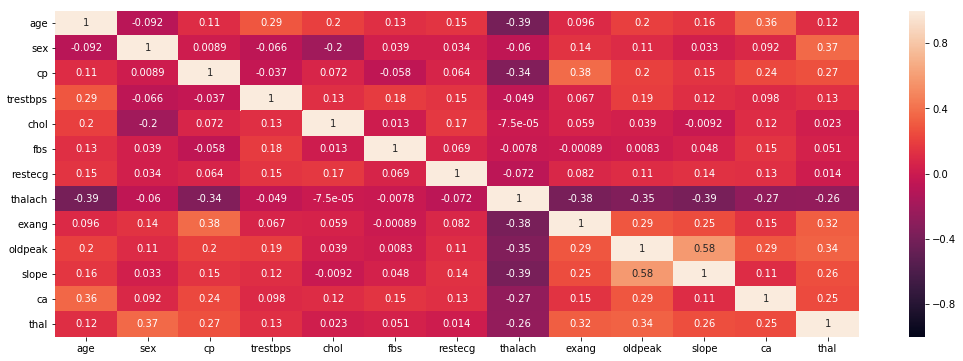

In [133]:
plt.figure(figsize=(18,6))
corr = features.corr()
sns.heatmap(corr, annot=True, vmin=-1.0,)
plt.show()

** Conclusion: No really strong correlation between any pair of variables**

## outlier search

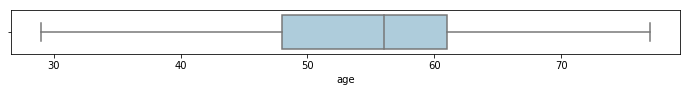

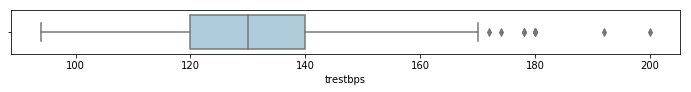

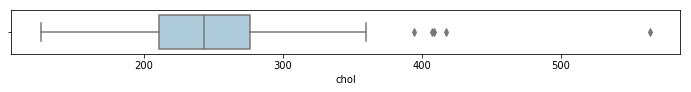

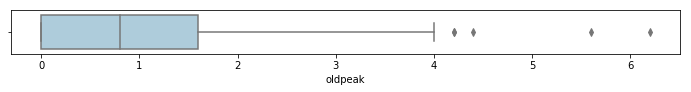

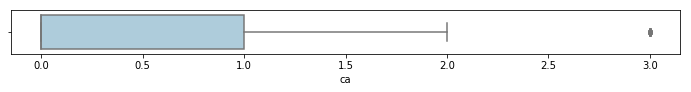

In [155]:
interesting_features=df[['age','trestbps','chol','thalach','oldpeak']]
for column in df2:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=df2, x=column,palette="Paired")
plt.show()

** Conclusion: this dataset contains outliers**